# Visualización de datos

## Carga de datos y módulos

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
iris = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

## Gráfico de puntos

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
1708


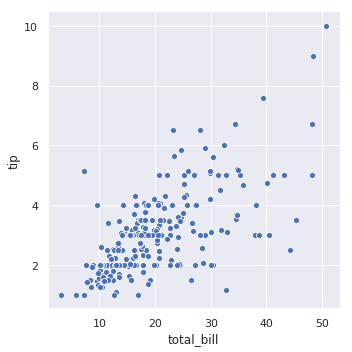

In [3]:
tips = sns.load_dataset("tips")
print (tips.head())
print (tips.size)
ax = sns.relplot(x="total_bill", y="tip", data=tips)

Cuando se plotean puntos en dos dimensiones, puede agregarse otra dimensión coloreando los puntos de acuerdo con una tercera variable. Esto se denomina *hue semantic* (*hue* = tono, matiz o tonalidad) debido a que el color de los puntos adquiere significado.

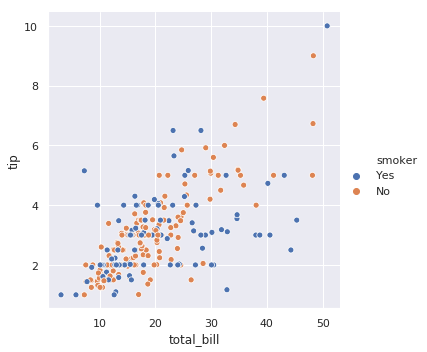

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

Para enfatizar la diferencia entre clases, y mejorar la **accesibilidad**, se puede utilizar un símbolo diferente (*marker*) para cada clase.

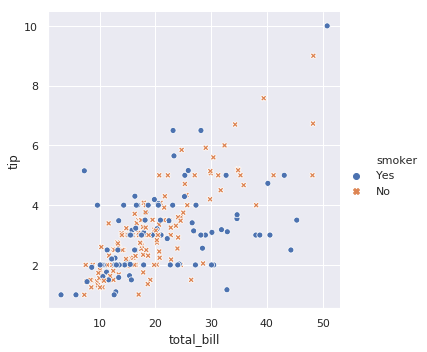

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

También es posible representar cuatro variables cambiando el *hue* y el estilo de cada punto independientemente, pero esto debe hacerse cuidadosamente pues el ojo es menos sensible a la forma que al color.

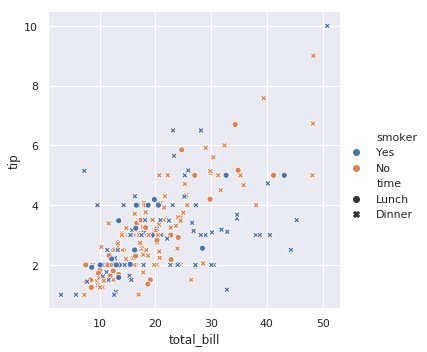

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

En los ejemplos anteriores, la semántica de tonos fue **categórica**, por lo que se aplicó una **paleta cualitativa**. Si la semántica de tonos es **numérica** (específicamente, puede transformarse en un flotante), el coloreado por defecto cambia a una **paleta secuencial**.

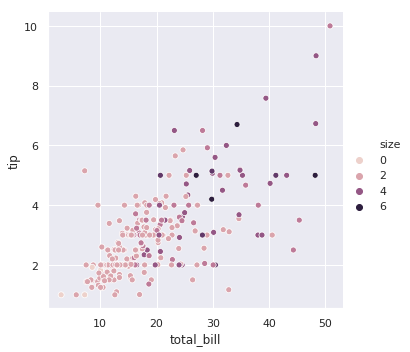

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

El tercer tipo de variable semántica cambia el tamaño de cada punto:

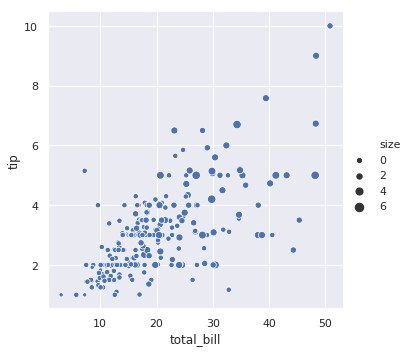

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

## Gráfico de líneas

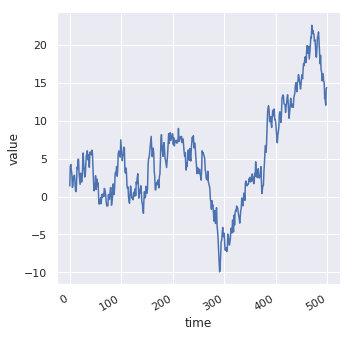

In [9]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Generalmente se asume que se está representando $y$ como función de $x$, por defecto se ordenan los datos por sus valores en $x$ antes de plotear. En algunos casos es conveniente deshabilitar esta opción: $x^2$

          x         y
0 -1.091746 -2.600804
1 -0.930015 -3.918401
2  0.405023 -6.974796
3 -0.098507 -5.308782
4 -0.092345 -5.376993


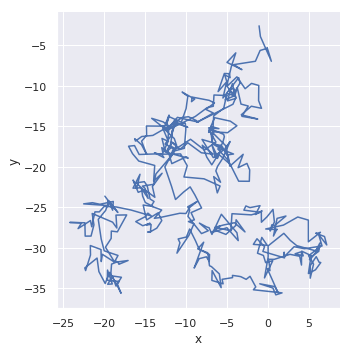

In [10]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
print (df.head())
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

### Agregación y representación de incertezas

Conjuntos de datos más complejos pueden tener múltiples mediciones para el mismo valor de la variable $x$. El comportamiento por defecto de seaborn es agregar múltiples mediciones para cada $x$ ploteando la media y el intervalo de confianza del 95% alrededor de la media:

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970
5320


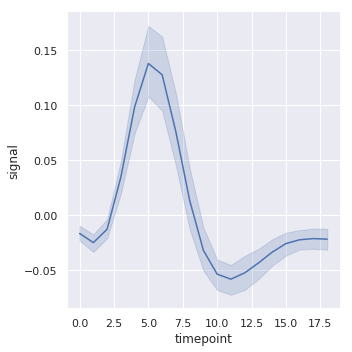

In [12]:
fmri = sns.load_dataset("fmri")
print (fmri.head())
print (fmri.size)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Otra buena opción, especialmente con grandes volúmenes de datos, es representar la dispersión de la distribución en cada punto temporal ploteando la desviación estándar en vez del intervalo de confianza:

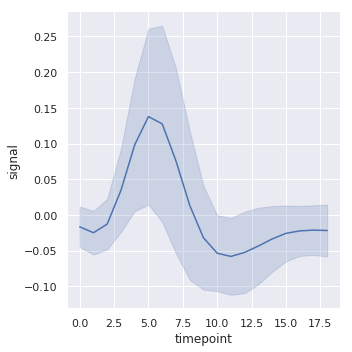

In [13]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

### Ploteando subconjuntos de datos utilizando mapeos semánticos

Los gráficos de línea tienen la misma flexibilidad que los de puntos: pueden mostrar hasta tres variables adicionales modificando *hue*, *size* y *style*. 
Además, utilizando semántica en los gráficos de línea podemos determinar cómo se agregan los datos. Por ejemplo, agregando la semántica de tonos con dos niveles dividimos el gráfico en dos líneas y barras de error, coloreando cada subconjunto a los datos que les corresponden:

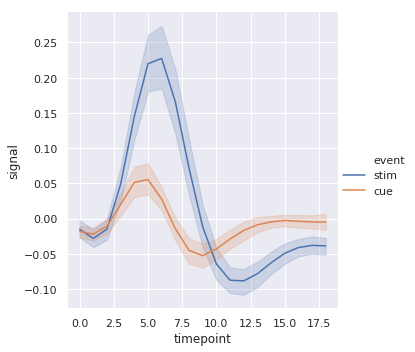

In [14]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

Agregando la semántica de estilo cambia el patrón de líneas:

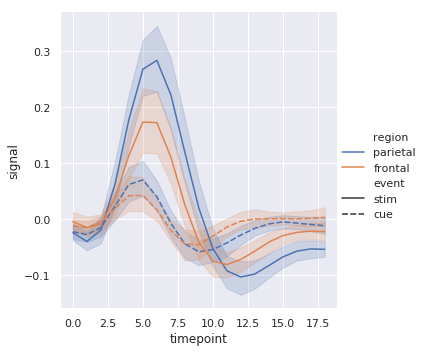

In [15]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

Podemos también identificar subconjuntos utilizando símbolos en vez del estilo de línea:

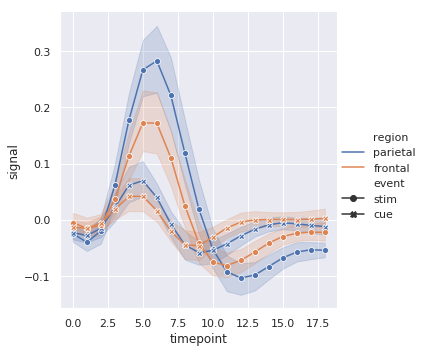

In [16]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

Igual que con los gráficos de puntos, hay que ser cuidadosos con usar múltiples semánticas. Mientras que muchas veces es informativo, también pueden generar gráficos difíciles de interpretar. De todos modos, aún cuando estamos examinando solo una variable adicional, puede ser útil alterar el color y el estilo de las líneas ya que puede mejorar la accesibilidad de personas daltónicas o cuando se imprime en blanco y negro.

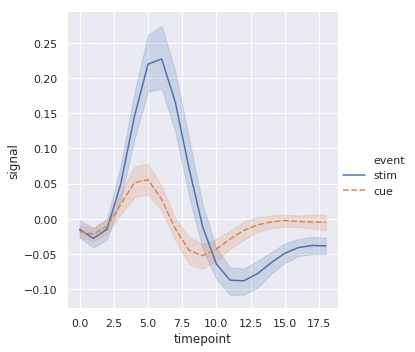

In [17]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

### Mostrando múltiples relaciones con facetas (o *subplots*)

Si bien las variables semánticas pueden mostrar múltiples relaciones en un gráfico, no siempre es la forma más efectiva de hacerlo. Muchas veces es mejor hacer más de un gráfico. Esto significa que se pueden hacer múltiples ejes y plotear sibconjuntos de datos en cada uno de ellos:

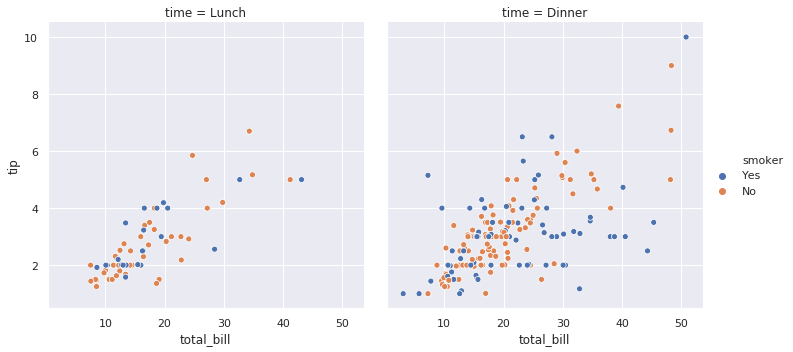

In [18]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

También puede mostrarse el efecto de dos variables *faceteando* una variable en columnas y la otra variable en filas:

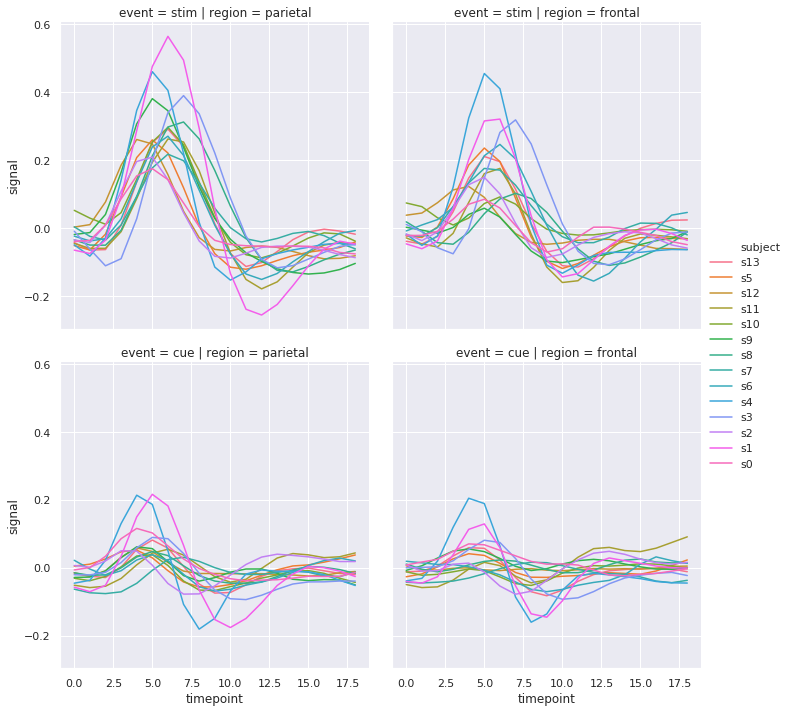

In [19]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri);

Si queremos examinar efectos a través de varios niveles de una variable, puede ser buena idea *facetear* la variable en columnas y luego "envolver" las facetas en filas:

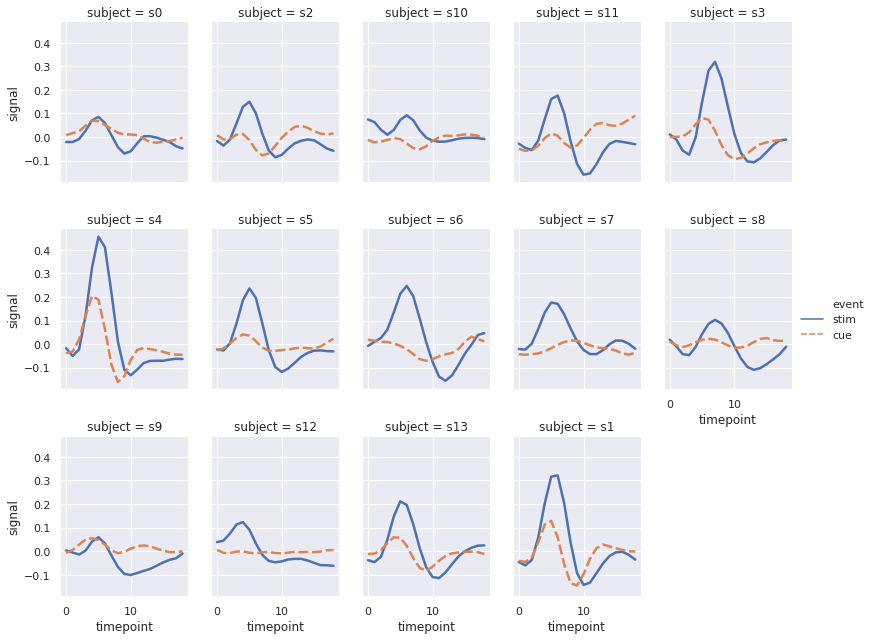

In [20]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

Estas visualizaciones, llamdas frecuentemente "malla", son muy efectivas ya que permiten presentar datos en un formato que hace fácil para la vista detectar patrones y desviaciones de esos patrones. Hay que tener en cuenta que suele ser más efectivo usar varios gráficos simples que uno complejo.

## Gráfico de barras

Un caso de uso de gráfico de barras es cuando queremos mostrar el número de observaciones en cada categoría.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
13365


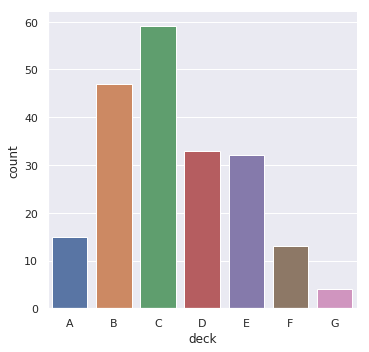

In [21]:
titanic = sns.load_dataset("titanic")
print (titanic.head())
print (titanic.size)
sns.catplot(x="deck", kind="count", data=titanic);

En otros casos, en algunas aplicaciones queremos mostrar una estimación de la tendencia central de los valores. El tipo 'bar' opera sobre todos los datos para obtener la estimación (por defecto la media) y un intervalo de confianza:

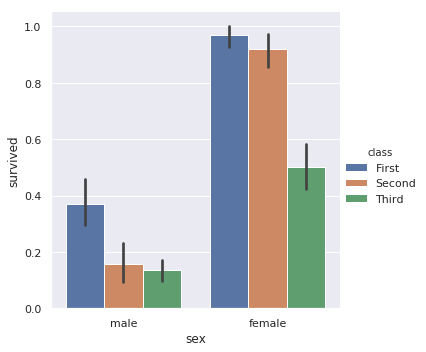

In [22]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Histogramas

Un histograma representa la distribución de datos mediante la formación de *bins* sobre un rango de los datos, y dibujando barras para mostrar el número de observaciones que cae en cada *bin*.

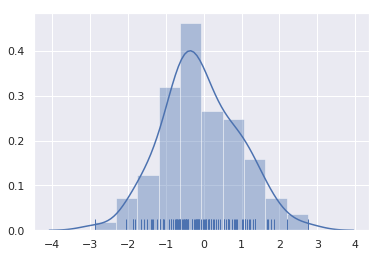

In [27]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True, rug=True);

Es posible complementar un histograma mediante el ajuste de una distribución paramétrica a un conjunto de datos y evaluar visualmente que tan cerca corresponde a los datos observados:

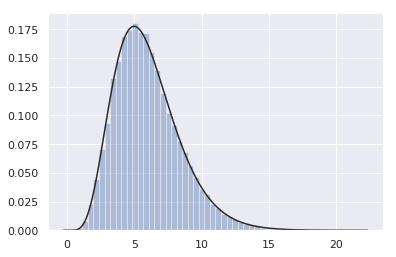

In [29]:
x = np.random.gamma(6, size=20000)
from scipy import stats
sns.distplot(x, kde=False, fit=stats.gamma);

### Distribuciones bivariadas

En caso de tener una conjunto de datos con dos distribuciones para dos variables, es posible crear una figura con múltiples paneles que muestra la relación bivariada entre las dos variables junto con la distribución univariada de cada una en ejes separados.

In [30]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

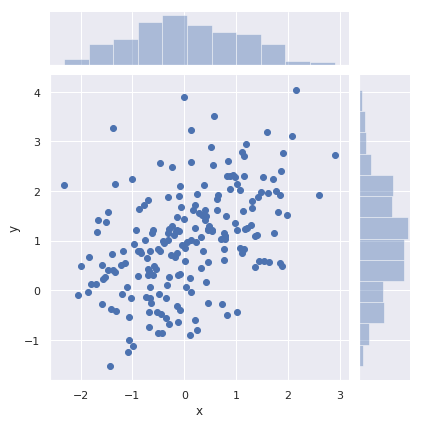

In [31]:
sns.jointplot(x="x", y="y", data=df);

Para mostrar múltiples distribuciones bivariadas de a pares en un conjunto de datos se puede usar la función **pairplot()**. Esto crea una matriz de ejes y muestra la relación para cada par de columnas en un DataFrame. Por defecto muestra también la distribución univariada en la diagonal:

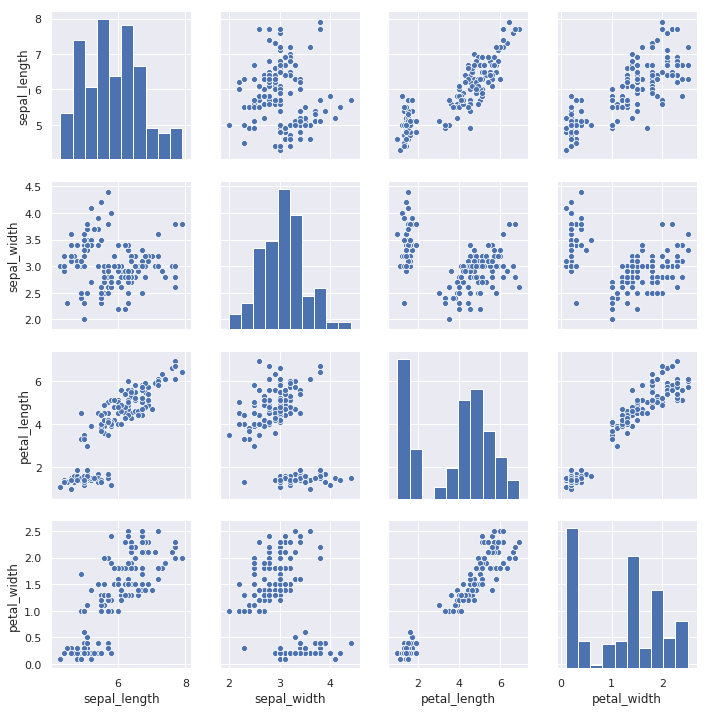

In [32]:
sns.pairplot(iris);

## Gráficos de caja

A medida que el tamaño del conjunto de datos crece, los gráficos categóricos resultan limitados en la información que proveen sobre la distribución de valores dentro de cada categoría. Cuando esto sucede son útiles otros tipos de gráficos que facilitan la comparación entre categorías, como los *box plots*:

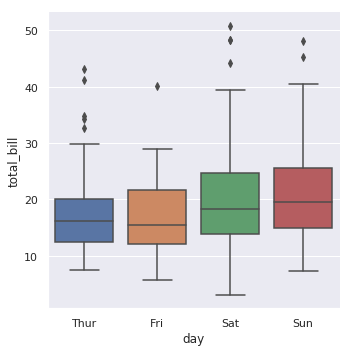

In [33]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Agregando una semántica de tonos, la caja para cada nivel de la variable semántica se mueve sobre el eje categórico para que no haya superposición:

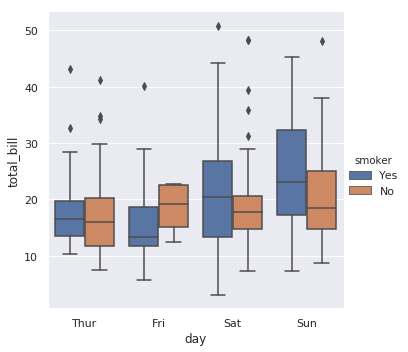

In [34]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Es posible también combinar un gráfico de "enjambre" con uno de caja para tener una descripción completa del conjunto de valores:

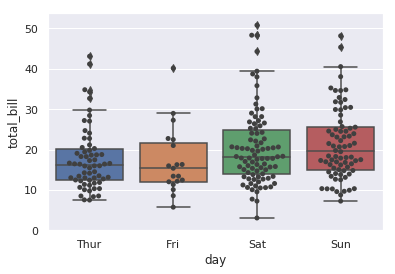

In [35]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

Agregando la opción **notch=True** se muestra la muesca con el intervalo de confianza de la media:

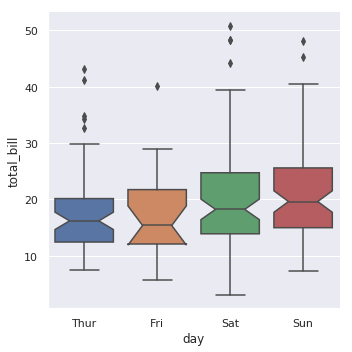

In [36]:
ax = sns.catplot(x="day", y="total_bill", kind="box", notch=True, data=tips);

## Mapa de calor

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
432


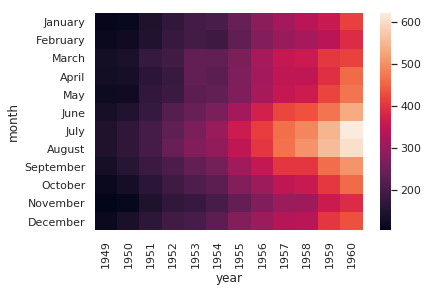

In [37]:
flights = sns.load_dataset("flights")
print (flights.head())
print (flights.size)
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

Es posible agregar los valores numéricos en cada celda:

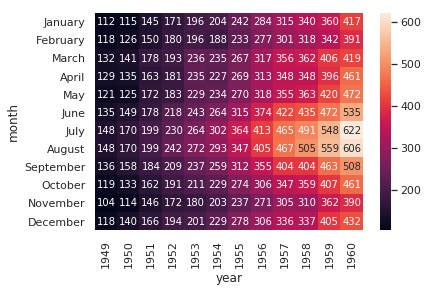

In [38]:
ax = sns.heatmap(flights, annot=True, fmt="d")